In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Data Train**
---
* This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
* Static data for all applications. One row represents one loan in our data sample.
---
**Identifikasi Aplikasi dan Target:**

* SK_ID_CURR: ID aplikasi pinjaman saat ini (unik untuk setiap aplikasi).
* TARGET: Variabel target atau variabel yang ingin diprediksi. Biasanya berisi informasi apakah aplikasi pinjaman berujung pada gagal bayar (default) atau tidak. Nilainya bisa 0 (tidak gagal bayar) atau 1 (gagal bayar).

**Informasi Kontrak dan Keuangan:**

* NAME_CONTRACT_TYPE: Jenis kontrak pinjaman (misalnya, pinjaman tunai, kredit konsumen, dll.). Type of loan contract (e.g., cash loan, consumer credit).
* AMT_INCOME_TOTAL: Total pendapatan pemohon. Total income of the applicant.
* AMT_CREDIT: Jumlah kredit yang diajukan. Amount of credit requested.
* AMT_ANNUITY: Jumlah anuitas pinjaman (pembayaran bulanan). Loan annuity amount (monthly payment).
* AMT_GOODS_PRICE: Harga barang yang dibeli dengan pinjaman. Price of the goods purchased with the loan.

**Data Demografi dan Personal:**

* CODE_GENDER: Jenis kelamin pemohon. Gender of the applicant.
* FLAG_OWN_CAR: Bendera yang menunjukkan apakah pemohon memiliki mobil (ya/tidak). Flag indicating car ownership (yes/no).
* FLAG_OWN_REALTY: Bendera yang menunjukkan apakah pemohon memiliki properti (ya/tidak). Flag indicating property ownership (yes/no).
* CNT_CHILDREN: Jumlah anak yang dimiliki pemohon. Number of children the applicant has.
* NAME_TYPE_SUITE: Jenis pendamping (misalnya, keluarga, sendiri, dll.). Type of accompaniment (e.g., family, alone).
* NAME_INCOME_TYPE: Jenis pendapatan pemohon (misalnya, bekerja, bisnis, dll.). Type of income (e.g., working, business).
* NAME_EDUCATION_TYPE: Tingkat pendidikan pemohon. Education level of the applicant.
* NAME_FAMILY_STATUS: Status keluarga pemohon. Family status of the applicant.
* NAME_HOUSING_TYPE: Jenis tempat tinggal pemohon. Type of housing the applicant has.
* CNT_FAM_MEMBERS: Jumlah anggota keluarga. Number of family members.

**Informasi Lokasi dan Kontak:**

* REGION_POPULATION_RELATIVE: Populasi relatif regional tempat tinggal pemohon. Relative population of the region where the applicant lives.
* REGION_RATING_CLIENT: Rating klien regional. Regional client rating.
* REGION_RATING_CLIENT_W_CITY: Rating klien regional dan kota. Regional and city client rating.
* WEEKDAY_APPR_PROCESS_START: Hari kerja saat aplikasi diproses. Day of the week the application was processed.
* HOUR_APPR_PROCESS_START: Jam saat aplikasi diproses. Hour of the day the application was processed.
* REG_REGION_NOT_LIVE_REGION: Bendera yang menunjukkan apakah wilayah registrasi berbeda dengan wilayah tempat tinggal (ya/tidak). Flag indicating if registration region is different from living region.
* REG_REGION_NOT_WORK_REGION: Bendera yang menunjukkan apakah wilayah registrasi berbeda dengan wilayah tempat kerja (ya/tidak). Flag indicating if registration region is different from work region.
* LIVE_REGION_NOT_WORK_REGION: Bendera yang menunjukkan apakah wilayah tempat tinggal berbeda dengan wilayah tempat kerja (ya/tidak). Flag indicating if living region is different from work region.
* REG_CITY_NOT_LIVE_CITY: Bendera yang menunjukkan apakah kota registrasi berbeda dengan kota tempat tinggal (ya/tidak). Flag indicating if registration city is different from living city.
* REG_CITY_NOT_WORK_CITY: Bendera yang menunjukkan apakah kota registrasi berbeda dengan kota tempat kerja (ya/tidak). Flag indicating if registration city is different from work city.
* LIVE_CITY_NOT_WORK_CITY: Bendera yang menunjukkan apakah kota tempat tinggal berbeda dengan kota tempat kerja (ya/tidak). Flag indicating if living city is different from work city.
* DAYS_BIRTH: Umur pemohon dalam hari. Applicant's age in days.
* DAYS_EMPLOYED: Lama bekerja pemohon dalam hari. Applicant's employment length in days.
* DAYS_REGISTRATION: Lama waktu registrasi pemohon dalam hari. Applicant's registration length in days.
* DAYS_ID_PUBLISH: Lama waktu penerbitan ID pemohon dalam hari. Applicant's ID publication length in days.
* DAYS_LAST_PHONE_CHANGE: Lama waktu perubahan nomor telepon terakhir dalam hari. Days since the applicant last changed their phone number.
* FLAG_MOBIL: Bendera yang menunjukkan apakah pemohon memiliki telepon seluler (ya/tidak). Flag indicating mobile phone ownership.
* FLAG_EMP_PHONE: Bendera yang menunjukkan apakah pemohon memiliki telepon kantor (ya/tidak). Flag indicating employment phone ownership.
* FLAG_WORK_PHONE: Bendera yang menunjukkan apakah pemohon memiliki telepon tempat kerja (ya/tidak). Flag indicating work phone ownership.
* FLAG_CONT_MOBILE: Bendera yang menunjukkan apakah pemohon dapat dihubungi melalui telepon seluler (ya/tidak). Flag indicating if the applicant can be contacted via mobile phone.
* FLAG_PHONE: Bendera yang menunjukkan apakah pemohon memiliki telepon (ya/tidak). Flag indicating phone ownership.
* FLAG_EMAIL: Bendera yang menunjukkan apakah pemohon memiliki email (ya/tidak). Flag indicating email ownership.

**Informasi Pekerjaan dan Organisasi:**

* OCCUPATION_TYPE: Jenis pekerjaan pemohon. Type of occupation.
* ORGANIZATION_TYPE: Jenis organisasi tempat pemohon bekerja. Type of organization where the applicant works.

**Informasi Dokumen dan Status:**

* FLAG_DOCUMENT_2 s/d FLAG_DOCUMENT_21: Bendera yang menunjukkan apakah pemohon memberikan dokumen-dokumen tertentu (ya/tidak). Flags indicating if the applicant provided specific documents (yes/no).
* FONDKAPREMONT_MODE: Mode renovasi gedung. Building renovation mode.
* HOUSETYPE_MODE: Jenis rumah. House type.
* TOTALAREA_MODE: Mode area total. Total area mode.
* WALLSMATERIAL_MODE: Mode material dinding. Wall material mode.
* EMERGENCYSTATE_MODE: Mode status darurat. Emergency state mode.

**Lingkaran Sosial dan Riwayat Kredit:**

* OBS_30_CNT_SOCIAL_CIRCLE: Jumlah observasi lingkaran sosial dengan keterlambatan 30 hari. Number of observations of social circle with 30-day delay.
* DEF_30_CNT_SOCIAL_CIRCLE: Jumlah default 30 hari dalam lingkaran sosial. Number of 30-day defaults in social circle.
* OBS_60_CNT_SOCIAL_CIRCLE: Jumlah observasi lingkaran sosial dengan keterlambatan 60 hari. Number of observations of social circle with 60-day delay.
* DEF_60_CNT_SOCIAL_CIRCLE: Jumlah default 60 hari dalam lingkaran sosial. Number of 60-day defaults in social circle.
* AMT_REQ_CREDIT_BUREAU_HOUR: Jumlah permintaan informasi biro kredit per jam. Number of credit bureau inquiries per hour.
* AMT_REQ_CREDIT_BUREAU_DAY: Jumlah permintaan informasi biro kredit per hari. Number of credit bureau inquiries per day.
* AMT_REQ_CREDIT_BUREAU_WEEK: Jumlah permintaan informasi biro kredit per minggu. Number of credit bureau inquiries per week.
* AMT_REQ_CREDIT_BUREAU_MON: Jumlah permintaan informasi biro kredit per bulan. Number of credit bureau inquiries per month.
* AMT_REQ_CREDIT_BUREAU_QRT: Jumlah permintaan informasi biro kredit per kuartal. Number of credit bureau inquiries per quarter.
* AMT_REQ_CREDIT_BUREAU_YEAR: Jumlah permintaan informasi biro kredit per tahun. Number of credit bureau inquiries per year.

**Informasi Properti:**

* APARTMENTS_AVG s/d NONLIVINGAREA_MEDI: Berbagai informasi tentang apartemen (rata-rata, mode, median). Kemungkinan besar mewakili ukuran, kondisi, dan fasilitas properti. Various information about apartments (average, mode, median), likely representing size, condition, and facilities.

**Data ini sangat kaya akan informasi dan dapat digunakan untuk berbagai keperluan, seperti:**

* Prediksi Gagal Bayar: Membangun model untuk memprediksi apakah seorang pemohon akan gagal bayar. Default prediction: Building models to predict whether an applicant will default.
* Analisis Risiko Kredit: Memahami faktor-faktor yang mempengaruhi risiko kredit. *Credit risk analysis: Understanding the
* Segmentasi Pelanggan: Mengelompokkan pelanggan berdasarkan karakteristik mereka.

In [3]:
# Load data train
df_ap_train = pd.read_csv('/content/gdrive/MyDrive/homecredit/application_train.csv')
df_ap_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Checking Data Train

In [4]:
df_ap_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [5]:
df_ap_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : 'Percent Missing (%)'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    'Percent Missing (%)', ascending=False).round(2)

    # Print some summary information
    print ('Your selected dataframe has ' + str(df.shape[1]) + ' columns.\n'
            'There are ' + str(mis_val_table_ren_columns.shape[0]) + ' columns that have missing values.')

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [7]:
missing_values_table(df_ap_train)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,Percent Missing (%)
COMMONAREA_MEDI,214865,69.87
COMMONAREA_MODE,214865,69.87
COMMONAREA_AVG,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_MEDI,213514,69.43
...,...,...
EXT_SOURCE_2,660,0.21
AMT_GOODS_PRICE,278,0.09
AMT_ANNUITY,12,0.00
CNT_FAM_MEMBERS,2,0.00


Terdapat beberapa variabel yang memiliki persentase missing value >50%. Variabel tersebut akan dihapus pada proses preprocessing karena variabel tersebut dianggap tidak terlalu penting, sehingga menghapus kolom tersebut mungkin merupakan pilihan yang baik sekaligus melakukan proses feature engineering (mengurangi variabel)

In [8]:
duplicate_rows_train = df_ap_train[df_ap_train.duplicated()]
print(f"Number of duplicate rows in data train: {len(duplicate_rows_train)}")

if len(duplicate_rows_train) > 0:
  print("Duplicate rows in df_ap_train:")
duplicate_rows_train

Number of duplicate rows in data train: 0


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


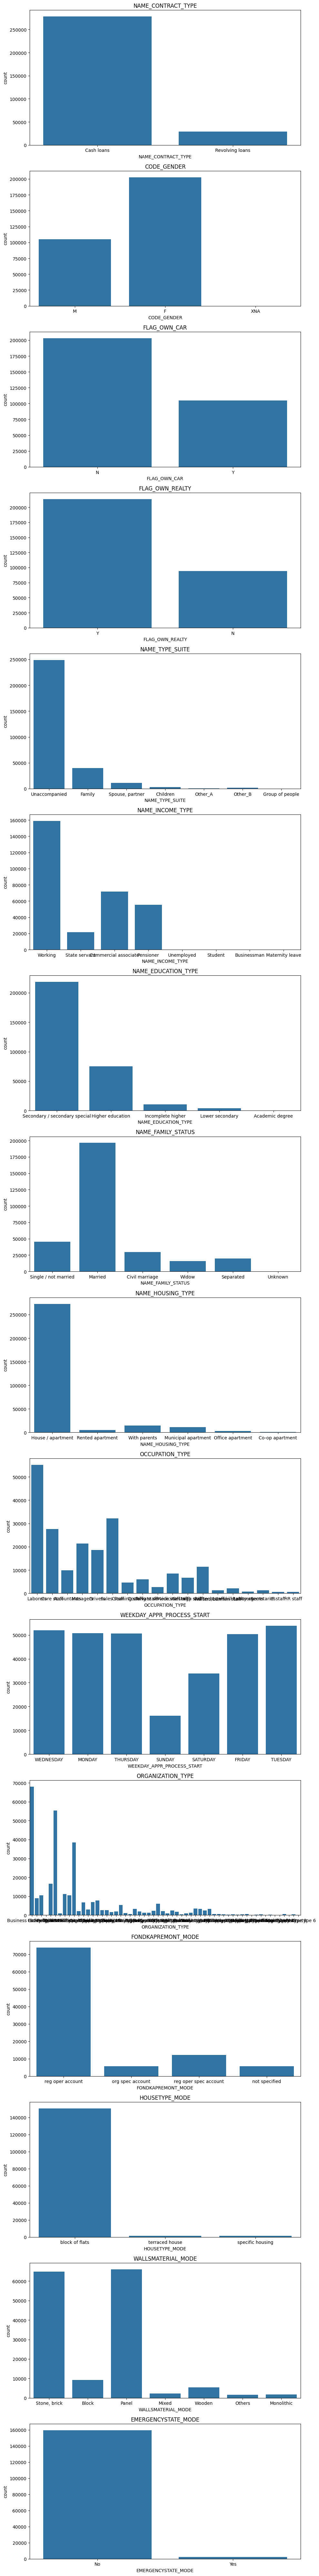

In [9]:
# Melihat sebaran data kategorik
object_cols = df_ap_train.select_dtypes(include='object').columns

fig, axes = plt.subplots(nrows=len(object_cols), ncols=1, figsize=(10, 5*len(object_cols)))

for i, col in enumerate(object_cols):
    sns.countplot(x=col, data=df_ap_train, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [10]:
# Melihat sebaran data numerik
numerical_cols = df_ap_train.select_dtypes(include=['number']).columns

fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(10, 5*len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    df_ap_train[col].hist(ax=axes[i], bins=30)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Ubah tipe data numerik menjadi kategorik pada process preprocessing untuk variabel berikut:
* SK_ID_CURR
* TARGET

In [11]:
unique = df_ap_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0).to_frame('Jumlah Unique Kategori')

def get_unique_values(col):
  return df_ap_train[col].unique().tolist()

unique['Kategori'] = unique.index.map(get_unique_values)

unique

,Jumlah Unique Kategori,Kategori
NAME_CONTRACT_TYPE,2,"[Cash loans, Revolving loans]"
CODE_GENDER,3,"[M, F, XNA]"
FLAG_OWN_CAR,2,"[N, Y]"
FLAG_OWN_REALTY,2,"[Y, N]"
NAME_TYPE_SUITE,7,"[Unaccompanied, Family, Spouse, partner, Child..."
NAME_INCOME_TYPE,8,"[Working, State servant, Commercial associate,..."
NAME_EDUCATION_TYPE,5,"[Secondary / secondary special, Higher educati..."
NAME_FAMILY_STATUS,6,"[Single / not married, Married, Civil marriage..."
NAME_HOUSING_TYPE,6,"[House / apartment, Rented apartment, With par..."
OCCUPATION_TYPE,18,"[Laborers, Core staff, Accountants, Managers, ..."


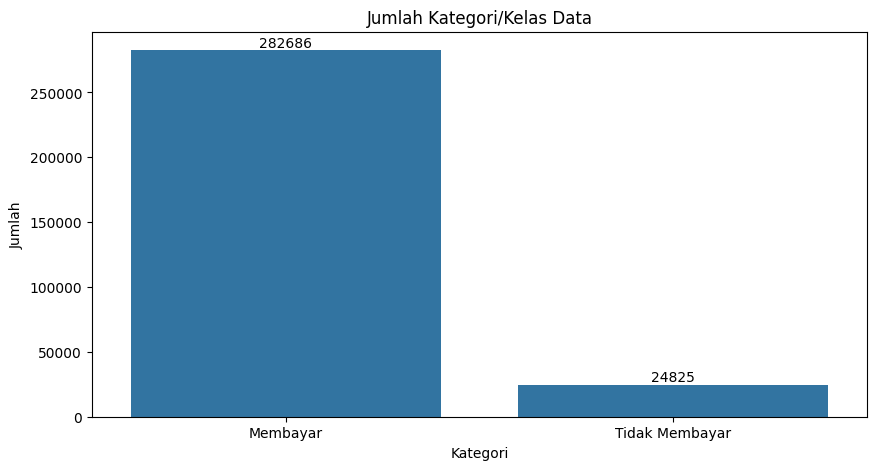

In [12]:
# Cek jumlah masing-masing target
plt.figure(figsize=(10, 5))
ax = sns.countplot(df_ap_train, x='TARGET')
plt.title('Jumlah Kategori/Kelas Data')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Membayar', 'Tidak Membayar'])

for container in ax.containers:
    ax.bar_label(container)
plt.show()

## Preprocessing Data Train

In [13]:
# Ubah tipe data
df_ap_train = df_ap_train.astype({'SK_ID_CURR':'object', 'TARGET':'object'})

In [14]:
# Hapus kolom dengan missing values di atas 10%
threshold = 10
cols_to_drop = df_ap_train.columns[df_ap_train.isnull().mean() * 100 > threshold]
df_ap_train.drop(cols_to_drop, axis=1, inplace=True)

In [15]:
# Cek missing value kembali
missing_values_table(df_ap_train)

Your selected dataframe has 65 columns.
There are 10 columns that have missing values.


,Missing Values,Percent Missing (%)
NAME_TYPE_SUITE,1292,0.42
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.33
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.33
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.33
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.33
EXT_SOURCE_2,660,0.21
AMT_GOODS_PRICE,278,0.09
AMT_ANNUITY,12,0.00
CNT_FAM_MEMBERS,2,0.00
DAYS_LAST_PHONE_CHANGE,1,0.00


Masih terdapat beberapa variabel yang memiliki persentase missing value cukup besar. Penangan yang dilakukan adalah imputasi agar tidak terlalu banyak kehilangan informasi data

In [16]:
cols_to_check = missing_values_table(df_ap_train).index

for col in cols_to_check:
    print(f"Tipe data kolom '{col}': {df_ap_train[col].dtype}")

Your selected dataframe has 65 columns.
There are 10 columns that have missing values.
Tipe data kolom 'NAME_TYPE_SUITE': object
Tipe data kolom 'OBS_30_CNT_SOCIAL_CIRCLE': float64
Tipe data kolom 'DEF_60_CNT_SOCIAL_CIRCLE': float64
Tipe data kolom 'DEF_30_CNT_SOCIAL_CIRCLE': float64
Tipe data kolom 'OBS_60_CNT_SOCIAL_CIRCLE': float64
Tipe data kolom 'EXT_SOURCE_2': float64
Tipe data kolom 'AMT_GOODS_PRICE': float64
Tipe data kolom 'AMT_ANNUITY': float64
Tipe data kolom 'CNT_FAM_MEMBERS': float64
Tipe data kolom 'DAYS_LAST_PHONE_CHANGE': float64


Your selected dataframe has 65 columns.
There are 10 columns that have missing values.


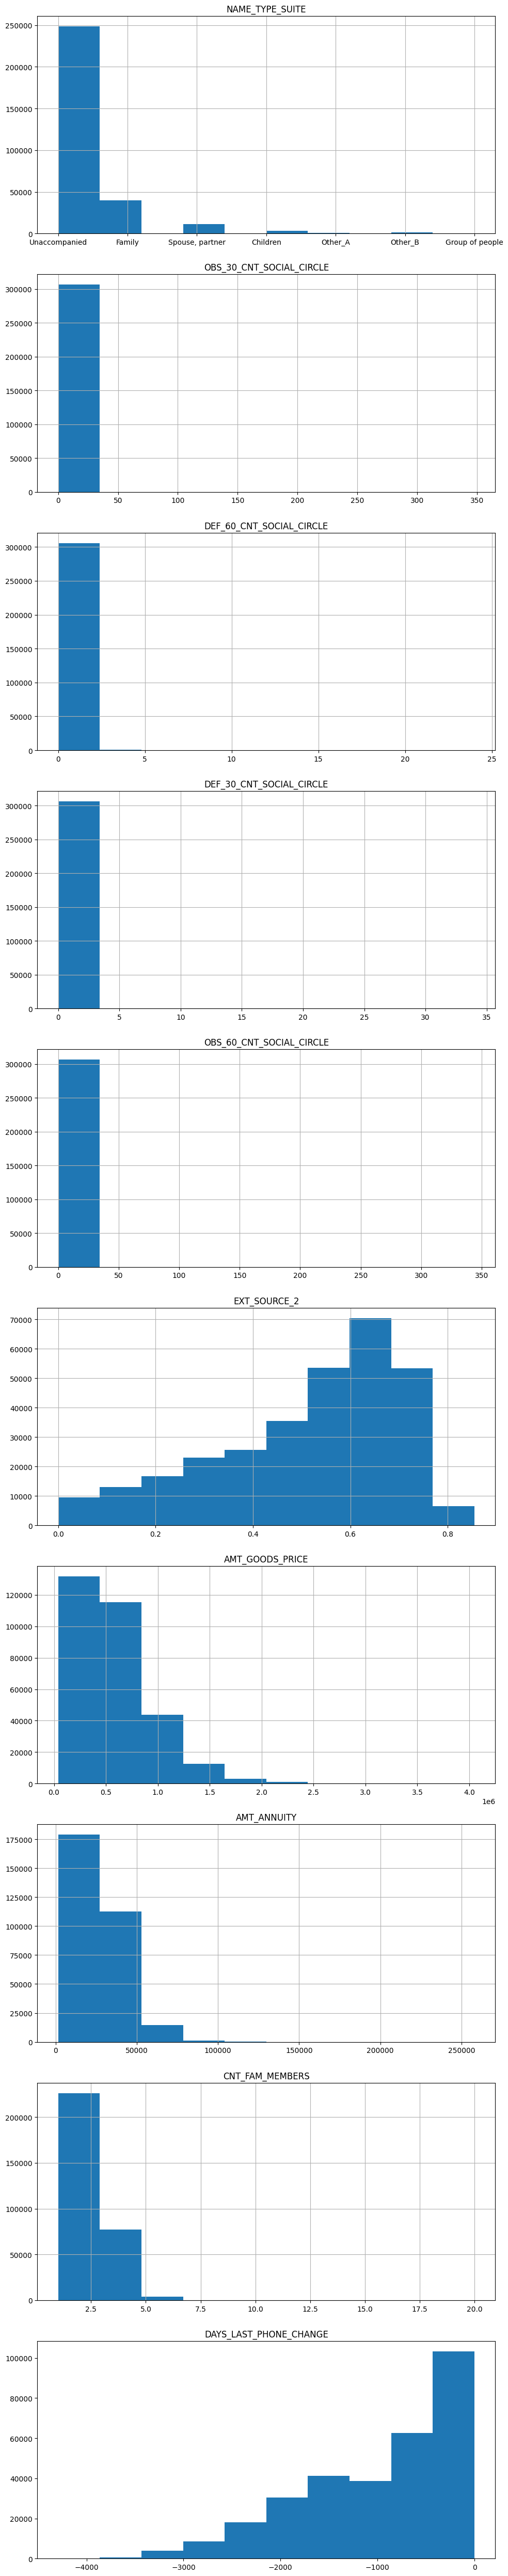

In [17]:
cols_to_plot = missing_values_table(df_ap_train).index

# Atur ukuran gambar dan tata letak subplot
fig, axes = plt.subplots(nrows=len(cols_to_plot), ncols=1, figsize=(10, 5*len(cols_to_plot)))

# Loop melalui kolom-kolom dan buat histogram untuk setiap kolom
for i, col in enumerate(cols_to_plot):
    df_ap_train[col].hist(ax=axes[i])
    axes[i].set_title(col)

# Tampilkan plot
plt.tight_layout()
plt.grid(False)
plt.show()

In [18]:
# Mengisi Missing Values dengan Median (untuk data numerik)
for col in df_ap_train.select_dtypes(include=np.number):
    df_ap_train[col].fillna(df_ap_train[col].median(), inplace=True)

# Mengisi Missing Values dengan Modus (untuk data kategorikal)
for col in df_ap_train.select_dtypes(include='object'):
    df_ap_train[col].fillna(df_ap_train[col].mode()[0], inplace=True)

In [19]:
missing_values_table(df_ap_train)

Your selected dataframe has 65 columns.
There are 0 columns that have missing values.


,Missing Values,Percent Missing (%)


In [20]:
numerical_cols = df_ap_train.select_dtypes(include=np.number).columns

Q1 = df_ap_train[numerical_cols].quantile(0.25)
Q3 = df_ap_train[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = (df_ap_train[numerical_cols] < lower_bound) | (df_ap_train[numerical_cols] > upper_bound)

outliers_per_col = outliers.sum()

# Filter kolom dengan outlier > 0
cols_with_outliers = outliers_per_col[outliers_per_col > 0]

# Tampilkan statistik outlier hanya untuk kolom dengan outlier > 0
if not cols_with_outliers.empty:
    print("Statistik Outlier (hanya kolom dengan outlier > 0):")
    print(cols_with_outliers)
else:
    print("Tidak ada kolom yang memiliki outlier.")

Statistik Outlier (hanya kolom dengan outlier > 0):
CNT_CHILDREN                    4272
AMT_INCOME_TOTAL               14035
AMT_CREDIT                      6562
AMT_ANNUITY                     7504
AMT_GOODS_PRICE                14728
REGION_POPULATION_RELATIVE      8412
DAYS_EMPLOYED                  72217
DAYS_REGISTRATION                659
FLAG_MOBIL                         1
FLAG_EMP_PHONE                 55386
FLAG_WORK_PHONE                61308
FLAG_CONT_MOBILE                 574
FLAG_EMAIL                     17442
CNT_FAM_MEMBERS                 4007
REGION_RATING_CLIENT           80527
REGION_RATING_CLIENT_W_CITY    78027
HOUR_APPR_PROCESS_START         2257
REG_REGION_NOT_LIVE_REGION      4657
REG_REGION_NOT_WORK_REGION     15612
LIVE_REGION_NOT_WORK_REGION    12503
REG_CITY_NOT_LIVE_CITY         24039
REG_CITY_NOT_WORK_CITY         70867
LIVE_CITY_NOT_WORK_CITY        55215
OBS_30_CNT_SOCIAL_CIRCLE       19971
DEF_30_CNT_SOCIAL_CIRCLE       35166
OBS_60_CNT_SOCIAL_CIRCL

In [21]:
cols_with_outliers.index

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_1

In [22]:
numerical_cols = df_ap_train.select_dtypes(include=np.number).columns

# Hitung batas atas dan bawah
upper_bounds = {}
lower_bounds = {}
for col in numerical_cols:
    upper_bounds[col] = df_ap_train[col].quantile(0.95)
    lower_bounds[col] = df_ap_train[col].quantile(0.05)

# Fungsi winsorizing
def winsorize_col(df, col, lower_bound, upper_bound):
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Terapkan winsorizing pada semua kolom numerik
for col in numerical_cols:
    df_ap_train = winsorize_col(df_ap_train, col, lower_bounds[col], upper_bounds[col])

print("Dataframe setelah winsorizing:")
df_ap_train

Dataframe setelah winsorizing:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,9000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0.0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0.0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0.0,153000.0,677664.0,29979.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,456254,1,Cash loans,F,N,Y,0.0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


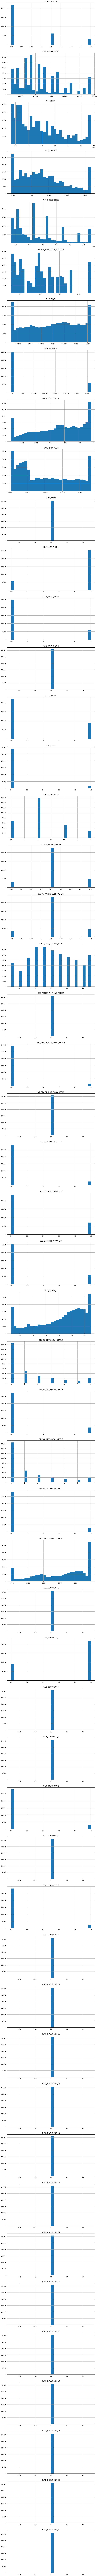

In [23]:
numerical_cols = df_ap_train.select_dtypes(include=['number']).columns

fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(10, 5*len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    df_ap_train[col].hist(ax=axes[i], bins=30)
    axes[i].set_title(col)

plt.tight_layout()
plt.grid(False)
plt.show()

In [24]:
if 'TARGET' not in df_ap_train.columns:
    raise KeyError("Kolom 'TARGET' tidak ditemukan di DataFrame asli.")

numeric_columns = df_ap_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
data = df_ap_train[numeric_columns + ['TARGET']]

correlation_matrix = data.corr()
correlation_with_label = correlation_matrix['TARGET'].drop('TARGET').sort_values(ascending=False)

# Buang nilai NaN sebelum mencari korelasi terendah
correlation_with_label_dropna = correlation_with_label.dropna()

# Ambil 15 korelasi positif tertinggi
print('Most Positive Correlations: \n', correlation_with_label.head(15))

# Ambil 15 korelasi negatif terendah setelah membuang NaN
print('\nMost Negative Correlations: \n', correlation_with_label_dropna.tail(15))

Most Positive Correlations: 
 DAYS_BIRTH                     0.077822
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055368
DAYS_ID_PUBLISH                0.051594
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041567
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.031962
DEF_60_CNT_SOCIAL_CIRCLE       0.030790
FLAG_WORK_PHONE                0.028524
CNT_CHILDREN                   0.018593
Name: TARGET, dtype: float64

Most Negative Correlations: 
 OBS_60_CNT_SOCIAL_CIRCLE      0.010666
CNT_FAM_MEMBERS               0.008226
REG_REGION_NOT_WORK_REGION    0.006942
FLAG_EMAIL                   -0.001758
AMT_ANNUITY                  -0.007896
FLAG_DOCUMENT_8              -0.008040
AMT_INCOME_TOTAL             -0.022851
FLAG_PHONE                   -0.02380

objective: memudahkan perusahaan dalam proses seleksi awal customer saat mengajukan pinjaman

streamlit:

In [25]:
correlation_with_label.index[:15] # To get the names of top 15 correlated columns as an Index object

Index(['DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3',
       'DAYS_REGISTRATION', 'LIVE_CITY_NOT_WORK_CITY',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'FLAG_WORK_PHONE', 'CNT_CHILDREN'],
      dtype='object')

In [26]:
df_ap_train[correlation_with_label.index[:15]].describe().T

,count,mean,std,min,25%,50%,75%,max
DAYS_BIRTH,307511.0,-16038.090267,4241.743719,-23204.0,-19682.0,-15750.0,-12413.0,-9407.0
REGION_RATING_CLIENT_W_CITY,307511.0,2.031521,0.502737,1.0,2.0,2.0,2.0,3.0
REGION_RATING_CLIENT,307511.0,2.052463,0.509034,1.0,2.0,2.0,2.0,3.0
DAYS_LAST_PHONE_CHANGE,307511.0,-945.073230,785.624919,-2522.0,-1570.0,-757.0,-274.0,0.0
DAYS_ID_PUBLISH,307511.0,-2989.319875,1469.619709,-4944.0,-4299.0,-3254.0,-1720.0,-375.0
REG_CITY_NOT_WORK_CITY,307511.0,0.230454,0.421124,0.0,0.0,0.0,0.0,1.0
FLAG_EMP_PHONE,307511.0,0.819889,0.384280,0.0,1.0,1.0,1.0,1.0
REG_CITY_NOT_LIVE_CITY,307511.0,0.078173,0.268444,0.0,0.0,0.0,0.0,1.0
FLAG_DOCUMENT_3,307511.0,0.710023,0.453752,0.0,0.0,1.0,1.0,1.0
DAYS_REGISTRATION,307511.0,-4916.494451,3332.170721,-11416.0,-7479.5,-4504.0,-2010.0,-330.0


Angka-angka di kolom DAYS_BIRTH adalah negatif karena dicatat berdasarkan aplikasi pinjaman saat ini. Untuk melihat statistik DAYS_BIRTH dalam beberapa tahun, kita dapat mengalikannya dengan -1 dan membaginya dengan jumlah hari dalam setahun.

In [27]:
(df_ap_train['DAYS_BIRTH'] / -365).describe()

,DAYS_BIRTH
count,307511.000000
mean,43.939973
std,11.621216
min,25.772603
25%,34.008219
50%,43.150685
75%,53.923288
max,63.572603


Tidak terdapat kejanggalan dalam statistik umur. Nilai-nilainya masih dalam batas normal.\
Korelasinya positif, tetapi nilai fitur ini sebenarnya negatif, yang berarti bahwa seiring bertambahnya usia klien, mereka cenderung tidak membayar pinjamannya. Hal tersebut nampaknya kurang sesuai, jsehingga akan diambil nilai absolut dari fitur tersebut dan korelasinya akan negatif.

In [28]:
# Korelasi antara DAYS_BIRTH positif dan target
df_ap_train['DAYS_BIRTH'] = abs(df_ap_train['DAYS_BIRTH'])
df_ap_train['DAYS_BIRTH'].corr(df_ap_train['TARGET'])

np.float64(-0.07782236754560014)

Seiring bertambahnya usia klien, ada korelasi linier negatif dengan target yang berarti bahwa seiring bertambahnya usia klien, mereka cenderung lebih sering membayar pinjamannya tepat waktu.

In [29]:
correlation_with_label_dropna.index[-15:]

Index(['OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS',
       'REG_REGION_NOT_WORK_REGION', 'FLAG_EMAIL', 'AMT_ANNUITY',
       'FLAG_DOCUMENT_8', 'AMT_INCOME_TOTAL', 'FLAG_PHONE',
       'HOUR_APPR_PROCESS_START', 'AMT_CREDIT', 'FLAG_DOCUMENT_6',
       'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED',
       'EXT_SOURCE_2'],
      dtype='object')

In [30]:
df_ap_train[correlation_with_label_dropna.index[-15:]].describe().T

,count,mean,std,min,25%,50%,75%,max
OBS_60_CNT_SOCIAL_CIRCLE,307511.0,1.266719,1.821663,0.000000,0.000000,0.000000,2.000000,6.000000e+00
CNT_FAM_MEMBERS,307511.0,2.137107,0.863865,1.000000,2.000000,2.000000,3.000000,4.000000e+00
REG_REGION_NOT_WORK_REGION,307511.0,0.050769,0.219526,0.000000,0.000000,0.000000,0.000000,1.000000e+00
FLAG_EMAIL,307511.0,0.056720,0.231307,0.000000,0.000000,0.000000,0.000000,1.000000e+00
AMT_ANNUITY,307511.0,26599.413954,12481.513843,9000.000000,16524.000000,24903.000000,34596.000000,5.332500e+04
FLAG_DOCUMENT_8,307511.0,0.081376,0.273412,0.000000,0.000000,0.000000,0.000000,1.000000e+00
AMT_INCOME_TOTAL,307511.0,163167.915380,72517.568752,67500.000000,112500.000000,147150.000000,202500.000000,3.375000e+05
FLAG_PHONE,307511.0,0.281066,0.449521,0.000000,0.000000,0.000000,1.000000,1.000000e+00
HOUR_APPR_PROCESS_START,307511.0,12.075386,2.943889,7.000000,10.000000,12.000000,14.000000,1.700000e+01
AMT_CREDIT,307511.0,584601.895290,356310.282054,135000.000000,270000.000000,513531.000000,808650.000000,1.350000e+06


Jika dilihat nilai maksimum pada DAYS_EMPLOYED, maka terlihat bahwa terdapat kejanggalan pada nilai maksimumnya, yaitu ilai maksimumnya (selain positif) bernilai sekitar 1000 Tahun. Coba cek kejanggalannya secara menyeluruh untuk DAYS_EMPLOYED.

In [31]:
anom = df_ap_train[df_ap_train['DAYS_EMPLOYED'] == 365243]
non_anom = df_ap_train[df_ap_train['DAYS_EMPLOYED'] != 365243]
print('Non-anomalies default adalah %0.2f%% dari data pinjaman' % (100 * non_anom['TARGET'].mean()))
print('Anomalies default adalah %0.2f%% dari data pinjaman' % (100 * anom['TARGET'].mean()))
print('Terdapat %d anomali DAYS_EMPLOYED' % len(anom))

Non-anomalies default adalah 8.66% dari data pinjaman
Anomalies default adalah 5.40% dari data pinjaman
Terdapat 55374 anomali DAYS_EMPLOYED


Text(0.5, 0, 'Days Employment')

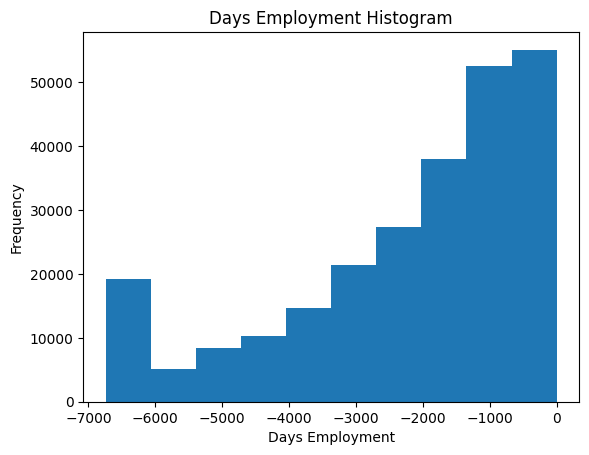

In [32]:
# Buat kolom anomali
df_ap_train['DAYS_EMPLOYED_ANOM'] = df_ap_train["DAYS_EMPLOYED"] == 365243

# Ganti anomali dengan NaN
df_ap_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

df_ap_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')

In [33]:
unique = df_ap_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0).to_frame('Jumlah Unique Kategori')

def get_unique_values(col):
  return df_ap_train[col].unique().tolist()

unique['Kategori'] = unique.index.map(get_unique_values)

unique

,Jumlah Unique Kategori,Kategori
SK_ID_CURR,307511,"[100002, 100003, 100004, 100006, 100007, 10000..."
TARGET,2,"[1, 0]"
NAME_CONTRACT_TYPE,2,"[Cash loans, Revolving loans]"
CODE_GENDER,3,"[M, F, XNA]"
FLAG_OWN_CAR,2,"[N, Y]"
FLAG_OWN_REALTY,2,"[Y, N]"
NAME_TYPE_SUITE,7,"[Unaccompanied, Family, Spouse, partner, Child..."
NAME_INCOME_TYPE,8,"[Working, State servant, Commercial associate,..."
NAME_EDUCATION_TYPE,5,"[Secondary / secondary special, Higher educati..."
NAME_FAMILY_STATUS,6,"[Single / not married, Married, Civil marriage..."


In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming df_ap_train is already loaded as in the previous code

# Separate features (X) and target variable (y)
X = df_ap_train.drop('TARGET', axis=1)
y = df_ap_train['TARGET']

# Select only numerical features for the model
numeric_cols = X.select_dtypes(include=['number']).columns
X = X[numeric_cols]

# Fill missing values with the mean (you can choose other strategies)
X = X.fillna(X.mean())

# Convert target variable to int type
y = y.astype(int) # This line converts the target variable to integer type

# Initialize and train a RandomForestClassifier (you can use other models)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

feature_importances

,feature,importance
26,EXT_SOURCE_2,0.097119
6,DAYS_BIRTH,0.078632
9,DAYS_ID_PUBLISH,0.077832
8,DAYS_REGISTRATION,0.077079
7,DAYS_EMPLOYED,0.075321
3,AMT_ANNUITY,0.072850
31,DAYS_LAST_PHONE_CHANGE,0.072298
2,AMT_CREDIT,0.066216
5,REGION_POPULATION_RELATIVE,0.057489
1,AMT_INCOME_TOTAL,0.055862


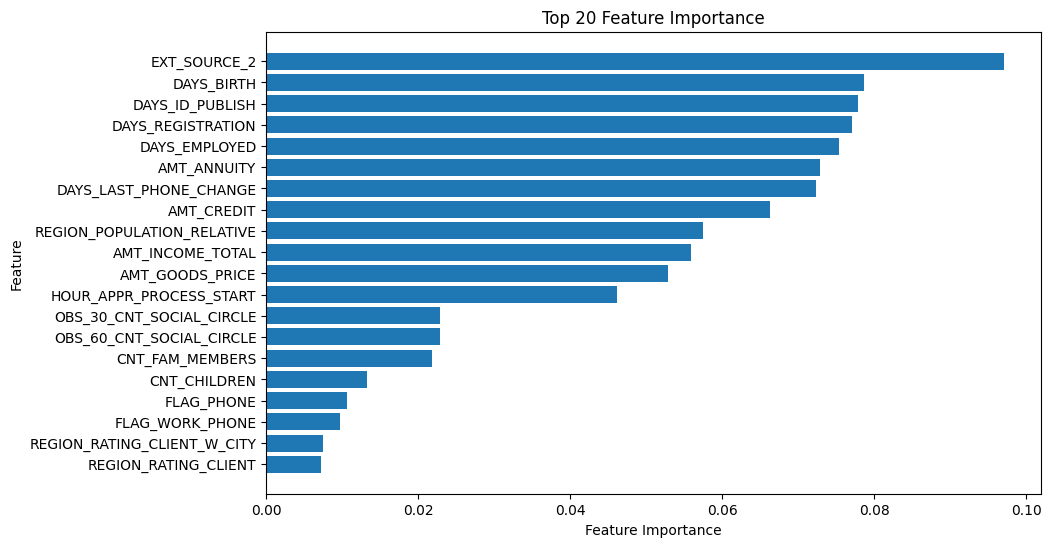

In [35]:
# prompt: plot feature importance

import matplotlib.pyplot as plt

# Assuming feature_importances DataFrame is already created as in the previous code

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'][:20], feature_importances['importance'][:20])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 20 Feature Importance")
plt.gca().invert_yaxis() # Invert y-axis to show the most important features at the top
plt.show()


In [36]:
feature_importances['feature'][:20].to_list()

['EXT_SOURCE_2',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'AMT_INCOME_TOTAL',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'CNT_FAM_MEMBERS',
 'CNT_CHILDREN',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT']

In [37]:
training = df_ap_train[['SK_ID_CURR','EXT_SOURCE_2',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'AMT_INCOME_TOTAL',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'CNT_FAM_MEMBERS',
 'CNT_CHILDREN',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT']]

# **Data Test**
---
* This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
* Static data for all applications. One row represents one loan in our data sample.
---
**Semua proses preprocessing yang dilakukan di data train akan dilakukan juga di data test**

In [38]:
df_ap_test = pd.read_csv('/content/gdrive/MyDrive/homecredit/application_test.csv')
df_ap_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


## Checking Data Test

In [39]:
df_ap_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [40]:
df_ap_test.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,48744.0,277796.676350,103169.547296,100001.0,188557.75,277549.0,367555.5,456250.0
CNT_CHILDREN,48744.0,0.397054,0.709047,0.0,0.00,0.0,1.0,20.0
AMT_INCOME_TOTAL,48744.0,178431.805855,101522.591536,26941.5,112500.00,157500.0,225000.0,4410000.0
AMT_CREDIT,48744.0,516740.435561,365397.004174,45000.0,260640.00,450000.0,675000.0,2245500.0
AMT_ANNUITY,48720.0,29426.240209,16016.368315,2295.0,17973.00,26199.0,37390.5,180576.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,42695.0,0.001803,0.046132,0.0,0.00,0.0,0.0,2.0
AMT_REQ_CREDIT_BUREAU_WEEK,42695.0,0.002787,0.054037,0.0,0.00,0.0,0.0,2.0
AMT_REQ_CREDIT_BUREAU_MON,42695.0,0.009299,0.110924,0.0,0.00,0.0,0.0,6.0
AMT_REQ_CREDIT_BUREAU_QRT,42695.0,0.546902,0.693305,0.0,0.00,0.0,1.0,7.0


In [41]:
missing_values_table(df_ap_test)

Your selected dataframe has 121 columns.
There are 64 columns that have missing values.


,Missing Values,Percent Missing (%)
COMMONAREA_AVG,33495,68.72
COMMONAREA_MODE,33495,68.72
COMMONAREA_MEDI,33495,68.72
NONLIVINGAPARTMENTS_AVG,33347,68.41
NONLIVINGAPARTMENTS_MODE,33347,68.41
...,...,...
OBS_30_CNT_SOCIAL_CIRCLE,29,0.06
OBS_60_CNT_SOCIAL_CIRCLE,29,0.06
DEF_60_CNT_SOCIAL_CIRCLE,29,0.06
AMT_ANNUITY,24,0.05


In [42]:
duplicate_rows_test = df_ap_test[df_ap_test.duplicated()]
print(f"Number of duplicate rows in data test: {len(duplicate_rows_test)}")

if len(duplicate_rows_test) > 0:
  print("Duplicate rows in df_ap_test:")
duplicate_rows_test

Number of duplicate rows in data test: 0


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


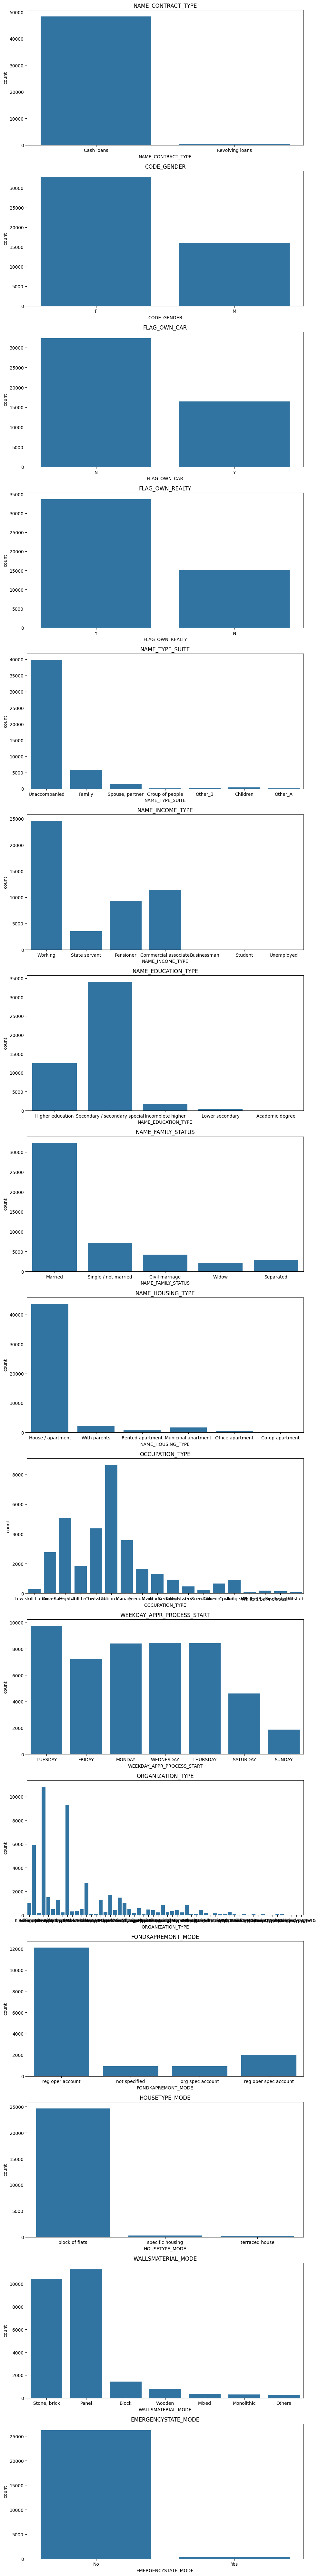

In [43]:
# Melihat sebaran data kategorik
object_cols = df_ap_test.select_dtypes(include='object').columns

fig, axes = plt.subplots(nrows=len(object_cols), ncols=1, figsize=(10, 5*len(object_cols)))

for i, col in enumerate(object_cols):
    sns.countplot(x=col, data=df_ap_test, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [44]:
# Melihat sebaran data numerik
numerical_cols = df_ap_test.select_dtypes(include=['number']).columns

fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(10, 5*len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    df_ap_test[col].hist(ax=axes[i], bins=30)
    axes[i].set_title(col)

plt.tight_layout()
plt.grid(False)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Preprocessing Data Test

In [45]:
# Ubah tipe data
df_ap_test = df_ap_test.astype({'SK_ID_CURR':'object'})

In [46]:
threshold = 10  # Hapus kolom dengan missing values di atas 10%
cols_to_drop = df_ap_test.columns[df_ap_test.isnull().mean() * 100 > threshold]
df_ap_test.drop(cols_to_drop, axis=1, inplace=True)

In [47]:
missing_values_table(df_ap_test)

Your selected dataframe has 64 columns.
There are 7 columns that have missing values.


,Missing Values,Percent Missing (%)
NAME_TYPE_SUITE,911,1.87
DEF_30_CNT_SOCIAL_CIRCLE,29,0.06
OBS_30_CNT_SOCIAL_CIRCLE,29,0.06
OBS_60_CNT_SOCIAL_CIRCLE,29,0.06
DEF_60_CNT_SOCIAL_CIRCLE,29,0.06
AMT_ANNUITY,24,0.05
EXT_SOURCE_2,8,0.02


In [48]:
cols_to_check = missing_values_table(df_ap_test).index

for col in cols_to_check:
    print(f"Tipe data kolom '{col}': {df_ap_test[col].dtype}")

Your selected dataframe has 64 columns.
There are 7 columns that have missing values.
Tipe data kolom 'NAME_TYPE_SUITE': object
Tipe data kolom 'DEF_30_CNT_SOCIAL_CIRCLE': float64
Tipe data kolom 'OBS_30_CNT_SOCIAL_CIRCLE': float64
Tipe data kolom 'OBS_60_CNT_SOCIAL_CIRCLE': float64
Tipe data kolom 'DEF_60_CNT_SOCIAL_CIRCLE': float64
Tipe data kolom 'AMT_ANNUITY': float64
Tipe data kolom 'EXT_SOURCE_2': float64


Your selected dataframe has 64 columns.
There are 7 columns that have missing values.


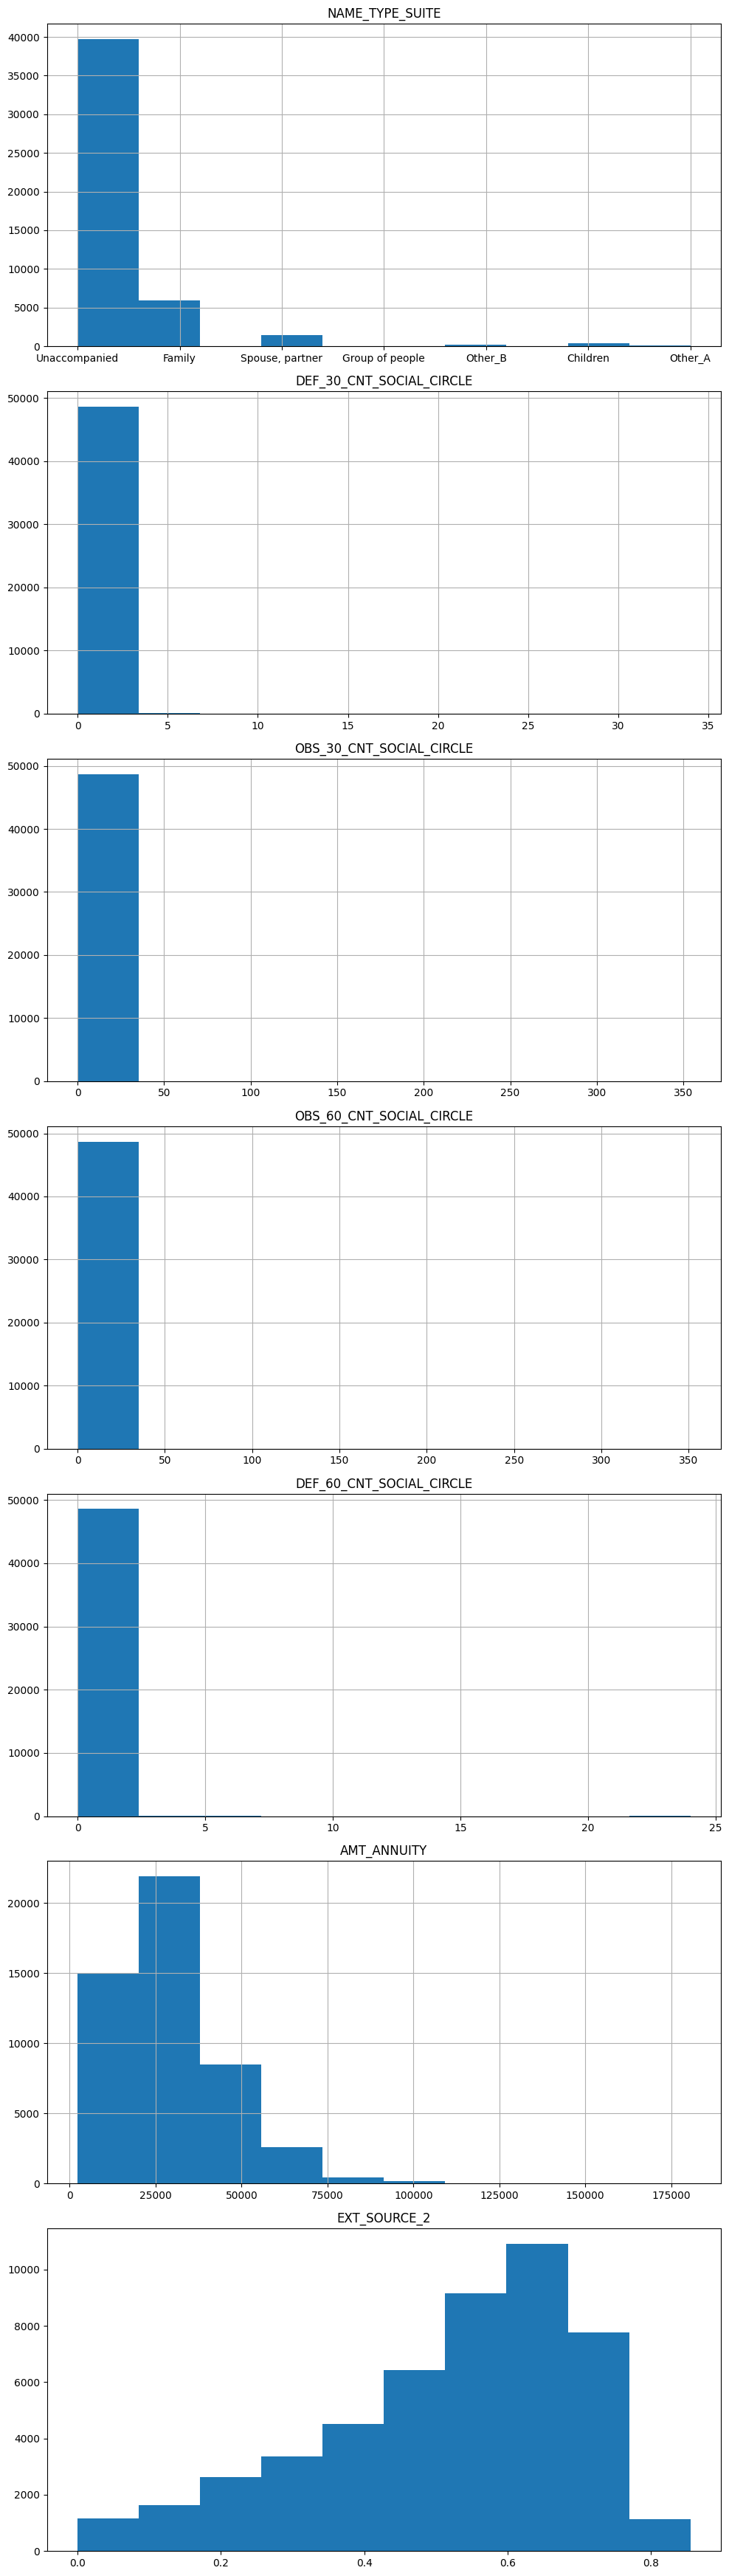

In [49]:
cols_to_plot = missing_values_table(df_ap_test).index

# Atur ukuran gambar dan tata letak subplot
fig, axes = plt.subplots(nrows=len(cols_to_plot), ncols=1, figsize=(10, 5*len(cols_to_plot)))

# Loop melalui kolom-kolom dan buat histogram untuk setiap kolom
for i, col in enumerate(cols_to_plot):
    df_ap_test[col].hist(ax=axes[i])
    axes[i].set_title(col)

# Tampilkan plot
plt.tight_layout()
plt.grid(False)
plt.show()

In [50]:
df_ap_test['DAYS_EMPLOYED_ANOM'] = df_ap_test["DAYS_EMPLOYED"] == 365243
print('There are %d anomalies in the test data out of %d entries' % (df_ap_test["DAYS_EMPLOYED_ANOM"].sum(), len(df_ap_test)))

df_ap_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

There are 9274 anomalies in the test data out of 48744 entries


In [51]:
df_ap_train['DAYS_BIRTH'] = abs(df_ap_train['DAYS_BIRTH'])

Karena sebaran variabel yang memiliki missing value cenderung skewed, maka metode yang cocok untuk menangani missing valuenya adalah imputasi median. Untuk data kategori akan ditangani menggunakan imputasi modus

In [52]:
# Mengisi Missing Values dengan Median (untuk data numerik)
for col in df_ap_test.select_dtypes(include=np.number):
    df_ap_test[col].fillna(df_ap_test[col].median(), inplace=True)

# Mengisi Missing Values dengan Modus (untuk data kategorikal)
for col in df_ap_test.select_dtypes(include='object'):
    df_ap_test[col].fillna(df_ap_test[col].mode()[0], inplace=True)

In [53]:
# Cek kembali missing value data test
missing_values_table(df_ap_test)

Your selected dataframe has 65 columns.
There are 0 columns that have missing values.


,Missing Values,Percent Missing (%)


In [54]:
numerical_cols = df_ap_test.select_dtypes(include=np.number).columns

Q1 = df_ap_test[numerical_cols].quantile(0.25)
Q3 = df_ap_test[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = (df_ap_test[numerical_cols] < lower_bound) | (df_ap_test[numerical_cols] > upper_bound)

outliers_per_col = outliers.sum()

# Filter kolom dengan outlier > 0
cols_with_outliers = outliers_per_col[outliers_per_col > 0]

# Tampilkan statistik outlier hanya untuk kolom dengan outlier > 0
if not cols_with_outliers.empty:
    print("Statistik Outlier (hanya kolom dengan outlier > 0):")
    print(cols_with_outliers)
else:
    print("Tidak ada kolom yang memiliki outlier.")

Statistik Outlier (hanya kolom dengan outlier > 0):
CNT_CHILDREN                     606
AMT_INCOME_TOTAL                1597
AMT_CREDIT                      2350
AMT_ANNUITY                     1173
AMT_GOODS_PRICE                 2122
REGION_POPULATION_RELATIVE      1565
DAYS_EMPLOYED                   3396
DAYS_REGISTRATION                109
FLAG_MOBIL                         1
FLAG_EMP_PHONE                  9275
FLAG_WORK_PHONE                 9978
FLAG_CONT_MOBILE                  78
FLAG_EMAIL                      7928
CNT_FAM_MEMBERS                  576
REGION_RATING_CLIENT           13388
REGION_RATING_CLIENT_W_CITY    12968
HOUR_APPR_PROCESS_START          407
REG_REGION_NOT_LIVE_REGION       918
REG_REGION_NOT_WORK_REGION      2689
LIVE_REGION_NOT_WORK_REGION     2049
REG_CITY_NOT_LIVE_CITY          3776
REG_CITY_NOT_WORK_CITY         10951
LIVE_CITY_NOT_WORK_CITY         8492
EXT_SOURCE_2                     412
OBS_30_CNT_SOCIAL_CIRCLE        3236
DEF_30_CNT_SOCIAL_CIRCL

In [55]:
numerical_cols = df_ap_test.select_dtypes(include=np.number).columns

# Hitung batas atas dan bawah
upper_bounds = {}
lower_bounds = {}
for col in numerical_cols:
    upper_bounds[col] = df_ap_test[col].quantile(0.95)
    lower_bounds[col] = df_ap_test[col].quantile(0.05)

# Fungsi winsorizing
def winsorize_col(df, col, lower_bound, upper_bound):
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Terapkan winsorizing pada semua kolom numerik
for col in numerical_cols:
    df_ap_test = winsorize_col(df_ap_test, col, lower_bounds[col], upper_bounds[col])

print("Dataframe setelah winsorizing:")
df_ap_test

Dataframe setelah winsorizing:


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,DAYS_EMPLOYED_ANOM
0,100001,Cash loans,F,N,Y,0.0,135000.0,568800.0,20560.500,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,100005,Cash loans,M,N,Y,0.0,99000.0,222768.0,17370.000,180000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,100013,Cash loans,M,Y,Y,0.0,202500.0,663264.0,58863.825,630000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,100028,Cash loans,F,N,Y,2.0,315000.0,1258650.0,49018.500,1125000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,100038,Cash loans,M,Y,N,1.0,180000.0,625500.0,32067.000,625500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0.0,121500.0,412560.0,17473.500,270000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
48740,456222,Cash loans,F,N,N,2.0,157500.0,622413.0,31909.500,495000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
48741,456223,Cash loans,F,Y,Y,1.0,202500.0,315000.0,33205.500,315000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
48742,456224,Cash loans,M,N,N,0.0,225000.0,450000.0,25128.000,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [56]:
df_ap_test[['SK_ID_CURR',
 'EXT_SOURCE_2',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'AMT_INCOME_TOTAL',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'CNT_FAM_MEMBERS',
 'CNT_CHILDREN',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT']]

,SK_ID_CURR,EXT_SOURCE_2,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,REGION_POPULATION_RELATIVE,...,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,CNT_FAM_MEMBERS,CNT_CHILDREN,FLAG_PHONE,FLAG_WORK_PHONE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT
0,100001,0.747762,-19241.0,-812.0,-5170.0,-2329.0,20560.500,-1740.0,568800.0,0.018850,...,450000.0,17.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0
1,100005,0.291656,-18064.0,-1623.0,-9118.0,-4469.0,17370.000,0.0,222768.0,0.035792,...,180000.0,9.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0
2,100013,0.699787,-20038.0,-3503.0,-2175.0,-4458.0,58863.825,-856.0,663264.0,0.019101,...,630000.0,14.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0
3,100028,0.509677,-13976.0,-4208.0,-2000.0,-1866.0,49018.500,-1805.0,1258650.0,0.026392,...,1125000.0,11.0,0.0,0.0,4.0,2.0,1.0,0.0,2.0,2.0
4,100038,0.425687,-13040.0,-4262.0,-4000.0,-2191.0,32067.000,-821.0,625500.0,0.010032,...,625500.0,7.0,0.0,0.0,3.0,1.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0.648575,-19970.0,-3399.0,-9094.0,-5169.0,17473.500,-684.0,412560.0,0.004960,...,270000.0,16.0,1.0,1.0,1.0,0.0,1.0,1.0,3.0,3.0
48740,456222,0.684596,-11186.0,-3003.0,-3015.0,-1149.0,31909.500,0.0,622413.0,0.035792,...,495000.0,11.0,2.0,2.0,4.0,2.0,0.0,0.0,2.0,2.0
48741,456223,0.632770,-15922.0,-1504.0,-2681.0,-3037.0,33205.500,-838.0,315000.0,0.026392,...,315000.0,12.0,0.0,0.0,3.0,1.0,1.0,0.0,2.0,2.0
48742,456224,0.445701,-13968.0,-1364.0,-1461.0,-2731.0,25128.000,-2308.0,450000.0,0.018850,...,450000.0,10.0,0.0,0.0,2.0,0.0,1.0,1.0,2.0,2.0


In [57]:
# prompt: join df_ap_train dan df_ap_test

import pandas as pd
# Assuming df_ap_train and df_ap_test are already loaded and preprocessed as shown in the provided code.

# Concatenate the two dataframes
df_ap_combined = pd.concat([df_ap_train, df_ap_test], ignore_index=True)

# Now df_ap_combined contains both training and testing data.
# You can further process this combined dataframe.

# Example: Display the first few rows of the combined dataframe
df_ap_combined


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,DAYS_EMPLOYED_ANOM
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,9000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,100007,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456221,NaN,Cash loans,F,N,Y,0.0,121500.0,412560.0,17473.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
356251,456222,NaN,Cash loans,F,N,N,2.0,157500.0,622413.0,31909.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
356252,456223,NaN,Cash loans,F,Y,Y,1.0,202500.0,315000.0,33205.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
356253,456224,NaN,Cash loans,M,N,N,0.0,225000.0,450000.0,25128.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [58]:
df_ap_combined = df_ap_combined.astype({'TARGET':'object'})
# Mengisi Missing Values dengan Median (untuk data numerik)
for col in df_ap_combined.select_dtypes(include=np.number):
    df_ap_combined[col].fillna(df_ap_combined[col].median(), inplace=True)

# Mengisi Missing Values dengan Modus (untuk data kategorikal)
for col in df_ap_combined.select_dtypes(include='object'):
    df_ap_combined[col].fillna(df_ap_combined[col].mode()[0], inplace=True)

In [59]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming df_ap_train is already loaded as in the previous code

# Separate features (X) and target variable (y)
X = df_ap_combined.drop('TARGET', axis=1)
y = df_ap_combined['TARGET']

# Select only numerical features for the model
numeric_cols = X.select_dtypes(include=['number']).columns
X = X[numeric_cols]

# Fill missing values with the mean (you can choose other strategies)
X = X.fillna(X.mean())

# Convert target variable to int type
y = y.fillna(0).astype(int)
y = y.astype(int) # This line converts the target variable to integer type

# Initialize and train a RandomForestClassifier (you can use other models)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

feature_importances

,feature,importance
26,EXT_SOURCE_2,0.097306
6,DAYS_BIRTH,0.086840
8,DAYS_REGISTRATION,0.077079
9,DAYS_ID_PUBLISH,0.077035
7,DAYS_EMPLOYED,0.074426
3,AMT_ANNUITY,0.073128
31,DAYS_LAST_PHONE_CHANGE,0.071950
2,AMT_CREDIT,0.065495
5,REGION_POPULATION_RELATIVE,0.056373
1,AMT_INCOME_TOTAL,0.055379


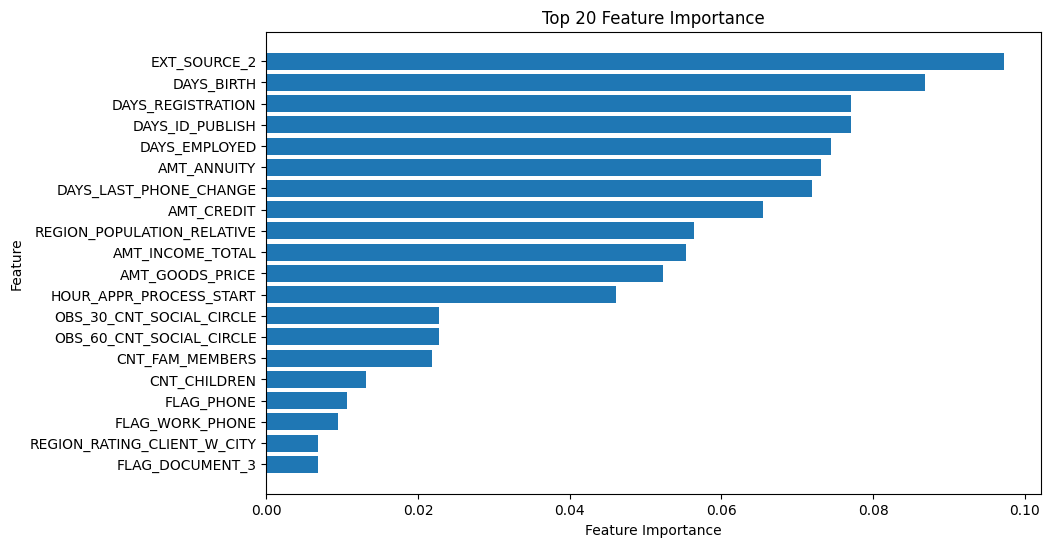

In [60]:
import matplotlib.pyplot as plt

# Assuming feature_importances DataFrame is already created as in the previous code

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'][:20], feature_importances['importance'][:20])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 20 Feature Importance")
plt.gca().invert_yaxis() # Invert y-axis to show the most important features at the top
plt.show()

In [61]:
feature_importances['feature'][:20].to_list()

['EXT_SOURCE_2',
 'DAYS_BIRTH',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'AMT_INCOME_TOTAL',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'CNT_FAM_MEMBERS',
 'CNT_CHILDREN',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'FLAG_DOCUMENT_3']

In [62]:
data = df_ap_combined[['TARGET', 'EXT_SOURCE_2',
 'DAYS_BIRTH',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'AMT_INCOME_TOTAL',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'CNT_FAM_MEMBERS',
 'CNT_CHILDREN',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_DOCUMENT_3',
 'REGION_RATING_CLIENT']]

In [63]:
# Encoding all object type variables
from sklearn.preprocessing import LabelEncoder
object_cols = data.select_dtypes(include='object').columns
for col in object_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      356255 non-null  int64  
 1   EXT_SOURCE_2                356255 non-null  float64
 2   DAYS_BIRTH                  356255 non-null  float64
 3   DAYS_REGISTRATION           356255 non-null  float64
 4   DAYS_ID_PUBLISH             356255 non-null  float64
 5   DAYS_EMPLOYED               356255 non-null  float64
 6   AMT_ANNUITY                 356255 non-null  float64
 7   DAYS_LAST_PHONE_CHANGE      356255 non-null  float64
 8   AMT_CREDIT                  356255 non-null  float64
 9   REGION_POPULATION_RELATIVE  356255 non-null  float64
 10  AMT_INCOME_TOTAL            356255 non-null  float64
 11  AMT_GOODS_PRICE             356255 non-null  float64
 12  HOUR_APPR_PROCESS_START     356255 non-null  float64
 13  OBS_30_CNT_SOC

In [64]:
from sklearn.preprocessing import LabelEncoder
df_ap_train
object_cols = df_ap_train.select_dtypes(include='object').columns
for col in object_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
data.info()

KeyError: 'SK_ID_CURR'

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['TARGET'])  # Fitur
y = data['TARGET']  # Target
print("Jumlah sampel per kelas sebelum SMOTE:")
print(y.value_counts())

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("\nJumlah sampel per kelas setelah SMOTE (pada data training):")
print(pd.Series(y_train_resampled).value_counts())

In [ ]:
# Scaling/standarisasi menggunakan standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)     # hanya fit di train
X_test_scaled = scaler.transform(X_test)           # transform test pakai mean & std dari train

# **Modelling**

## **XGBOOST**

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, roc_auc_score, confusion_matrix, recall_score, precision_score
# import xgboost as xgb
# xgb_model = xgb.XGBClassifier(random_state=42)

# xgb_model.fit(X_train_scaled, y_train_resampled)

# y_pred_xgb = xgb_model.predict(X_test_scaled)

# accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
# roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
# recall_xgb = recall_score(y_test, y_pred_xgb)
# precision_xgb = precision_score(y_test, y_pred_xgb)

# print(f"Accuracy (XGBoost): {accuracy_xgb}")
# print(f"ROC-AUC (XGBoost): {roc_auc_xgb}")
# print(f"Recall (XGBoost): {recall_xgb}")
# print(f"Precision (XGBoost): {precision_xgb}")
# print(classification_report(y_test, y_pred_xgb))

# cm_xgb = confusion_matrix(y_test, y_pred_xgb)
# print("Confusion Matrix (XGBoost):\n", cm_xgb)

## **Random Forest**

In [ ]:
# rf_model = RandomForestClassifier(random_state=42)

# rf_model.fit(X_train_scaled, y_train_resampled)

# y_pred_rf = rf_model.predict(X_test_scaled)

# accuracy_rf = accuracy_score(y_test, y_pred_rf)
# roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
# recall_rf = recall_score(y_test, y_pred_rf)
# precision_rf = precision_score(y_test, y_pred_rf)

# print(f"Accuracy (Random Forest): {accuracy_rf}")
# print(f"ROC-AUC (Random Forest): {roc_auc_rf}")
# print(f"Recall (Random Forest): {recall_rf}")
# print(f"Precision (Random Forest): {precision_rf}")
# print(classification_report(y_test, y_pred_rf))

# cm_rf = confusion_matrix(y_test, y_pred_rf)
# print("Confusion Matrix (Random Forest):\n", cm_rf)

# **Voting Ensemble**

In [ ]:
# from sklearn.ensemble import VotingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import (
#     accuracy_score, classification_report, confusion_matrix,
#     roc_auc_score, recall_score, precision_score
# )

# # Definisikan model-model base
# log_clf = LogisticRegression(max_iter=1000, random_state=42)
# rf_clf = RandomForestClassifier(random_state=42)
# svm_clf = SVC(probability=True, random_state=42)  # penting: SVC butuh probability=True untuk ROC

# # Buat voting ensemble
# voting_clf = VotingClassifier(
#     estimators=[
#         ('lr', log_clf),
#         ('rf', rf_clf),
#         ('svc', svm_clf)
#     ],
#     voting='soft'  # Gunakan 'soft' voting agar bisa dihitung ROC-AUC
# )

# # Fit model ke data latih
# voting_clf.fit(X_train_scaled, y_train_resampled)

# # Prediksi
# y_pred_voting = voting_clf.predict(X_test_scaled)

# # Evaluasi
# accuracy_voting = accuracy_score(y_test, y_pred_voting)
# roc_auc_voting = roc_auc_score(y_test, voting_clf.predict_proba(X_test_scaled)[:, 1])
# recall_voting = recall_score(y_test, y_pred_voting)
# precision_voting = precision_score(y_test, y_pred_voting)

# print(f"Accuracy (Voting Ensemble): {accuracy_voting}")
# print(f"ROC-AUC (Voting Ensemble): {roc_auc_voting}")
# print(f"Recall (Voting Ensemble): {recall_voting}")
# print(f"Precision (Voting Ensemble): {precision_voting}")
# print(classification_report(y_test, y_pred_voting))

# cm_voting = confusion_matrix(y_test, y_pred_voting)
# print("Confusion Matrix (Voting Ensemble):\n", cm_voting)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, classification_report, confusion_matrix

# Inisialisasi model SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Fit model pada data latih
svm_model.fit(X_train_scaled, y_train_resampled)

# Prediksi pada data uji
y_pred_svm = svm_model.predict(X_test_scaled)
y_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]  # untuk ROC-AUC

# Evaluasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
recall_svm = recall_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)

# Cetak hasil
print(f"Accuracy (SVM): {accuracy_svm}")
print(f"ROC-AUC (SVM): {roc_auc_svm}")
print(f"Recall (SVM): {recall_svm}")
print(f"Precision (SVM): {precision_svm}")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (SVM):\n", cm_svm)

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Assuming X_train_resampled, y_train_resampled, and X_test are already defined as in your previous code

# Initialize Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter

# Train the model
logreg_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
print(f"Accuracy (Logistic Regression): {accuracy_logreg}")
print(f"ROC-AUC (Logistic Regression): {roc_auc_logreg}")
print(f"Recall (Logistic Regression): {recall_logreg}")
print(f"Precision (Logistic Regression): {precision_logreg}")

# Classification report
print(classification_report(y_test, y_pred_logreg))

# Confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix (Logistic Regression):\n", cm_logreg)


Accuracy (Logistic Regression): 0.5462660173190552
ROC-AUC (Logistic Regression): 0.6079221348805152
Recall (Logistic Regression): 0.6796233219795632
Precision (Logistic Regression): 0.09940800656467969
              precision    recall  f1-score   support

           0       0.96      0.54      0.69     66260
           1       0.10      0.68      0.17      4991

    accuracy                           0.55     71251
   macro avg       0.53      0.61      0.43     71251
weighted avg       0.90      0.55      0.65     71251

Confusion Matrix (Logistic Regression):
 [[35530 30730]
 [ 1599  3392]]


# **Streamlit**

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.1 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, classification_report, confusion_matrix
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

# Load your preprocessed data (replace with your actual data loading)
# Make sure 'df_ap_combined' is available in your Streamlit environment
# For example:
# df_ap_combined = pd.read_csv("your_preprocessed_data.csv")

# Placeholder for your data (replace this with your actual data)
data = pd.DataFrame({'TARGET': [0,1,0,1,0,1,0,1], 'EXT_SOURCE_2': [0.5,0.8,0.2,0.9,0.3,0.7,0.6,0.1],
 'DAYS_BIRTH': [10000, 12000, 15000, 9000, 11000, 8000, 13000, 14000],
 'DAYS_REGISTRATION': [1,2,3,4,5,6,7,8],
 'DAYS_ID_PUBLISH': [1,2,3,4,5,6,7,8],
 'DAYS_EMPLOYED': [100,200,300,400,500,600,700,800]})

# Streamlit app
st.title("Home Credit Default Risk Prediction")

# Input features
st.sidebar.header("Input Features")
ext_source_2 = st.sidebar.slider("EXT_SOURCE_2", float(data['EXT_SOURCE_2'].min()), float(data['EXT_SOURCE_2'].max()), float(data['EXT_SOURCE_2'].mean()))
days_birth = st.sidebar.slider("DAYS_BIRTH", int(data['DAYS_BIRTH'].min()), int(data['DAYS_BIRTH'].max()), int(data['DAYS_BIRTH'].mean()))
days_registration = st.sidebar.slider("DAYS_REGISTRATION", int(data['DAYS_REGISTRATION'].min()), int(data['DAYS_REGISTRATION'].max()), int(data['DAYS_REGISTRATION'].mean()))
days_id_publish = st.sidebar.slider("DAYS_ID_PUBLISH", int(data['DAYS_ID_PUBLISH'].min()), int(data['DAYS_ID_PUBLISH'].max()), int(data['DAYS_ID_PUBLISH'].mean()))
days_employed = st.sidebar.slider("DAYS_EMPLOYED", int(data['DAYS_EMPLOYED'].min()), int(data['DAYS_EMPLOYED'].max()), int(data['DAYS_EMPLOYED'].mean()))



# Create input DataFrame
input_data = pd.DataFrame({
    'EXT_SOURCE_2': [ext_source_2],
    'DAYS_BIRTH': [days_birth],
    'DAYS_REGISTRATION': [days_registration],
    'DAYS_ID_PUBLISH': [days_id_publish],
    'DAYS_EMPLOYED': [days_employed],
})

# Preprocess input data (replace with your actual preprocessing steps)
# Example: fill missing values, encode categorical variables, etc.
# Example using the LabelEncoder for object columns (if needed)
for col in data.select_dtypes(include='object'):
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Assuming model is already trained
# Prediction
if st.button("Predict"):
  # Replace with your actual model and features
  prediction = 1 #Dummy Value

  st.write(f"Prediction: {prediction}")


2025-03-09 17:01:54.855 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 17:01:54.982 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-09 17:01:54.983 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 17:01:54.985 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 17:01:54.987 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 17:01:54.989 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 17:01:54.990 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 17:01:54.993 Thread 'MainThread': mi